<a href="https://colab.research.google.com/github/fayzi-dev/machin_learning/blob/main/stock_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Can we use Sentiment Analysis to Predict Stock Prices?**


*   *Stocks*
*   *Sentiment Analysis- Taking test and convertin it into a numeric value to represent the feeling of the text.*



In [2]:
!pip install yfinance -q

In [3]:
!pip install snscrape -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.2 MB/s eta 0:00:00


In [4]:
!pip install transformers -q

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

# Example pulling Microsoft Stock

In [6]:
msft = yf.Ticker("MSFT")

In [7]:
print(msft.info)

{'address1': 'One Microsoft Way', 'city': 'Redmond', 'state': 'WA', 'zip': '98052-6399', 'country': 'United States', 'phone': '425 882 8080', 'website': 'https://www.microsoft.com', 'industry': 'Software - Infrastructure', 'industryKey': 'software-infrastructure', 'industryDisp': 'Software - Infrastructure', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and pow

In [8]:
msft_info = (msft.info)
msft_info.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currenc

In [9]:
msft_info['totalRevenue']

254189993984

In [10]:
msft_hist = msft.history(period="max")
msft_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054594,0.062623,0.054594,0.059947,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.059946,0.063158,0.059946,0.062087,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062087,0.063694,0.062087,0.063158,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063158,0.063694,0.061017,0.061552,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061552,0.062087,0.059946,0.060482,47894400,0.0,0.0


In [11]:
msft_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9744 entries, 1986-03-13 00:00:00-05:00 to 2024-11-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9744 non-null   float64
 1   High          9744 non-null   float64
 2   Low           9744 non-null   float64
 3   Close         9744 non-null   float64
 4   Volume        9744 non-null   int64  
 5   Dividends     9744 non-null   float64
 6   Stock Splits  9744 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 609.0 KB


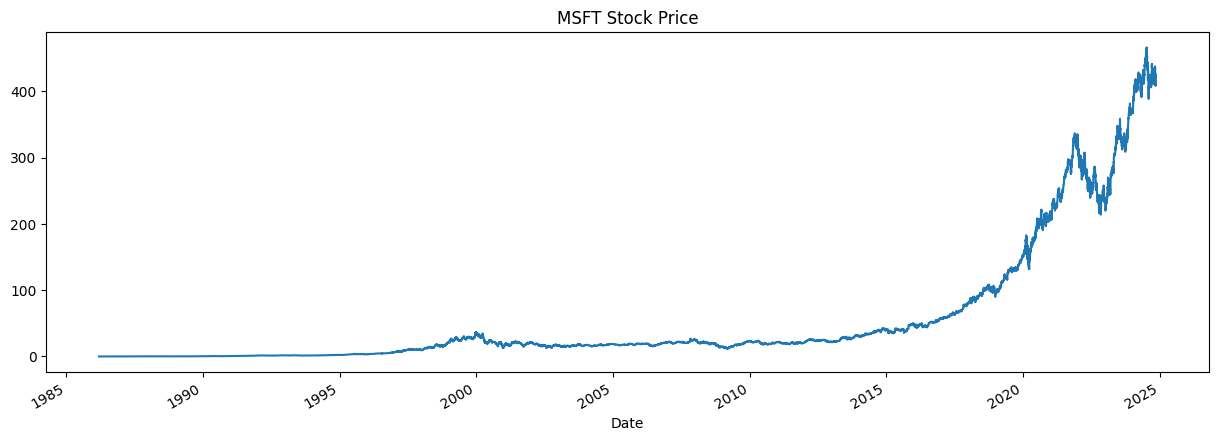

In [12]:
msft_hist['Open'].plot(figsize=(15,5), title="MSFT Stock Price")
plt.show()

# Pull A bunch of stocks


*   2 years of history



In [13]:
stocks = [
    'NVDA',
    'PINS',
    'TSLA',
    'SHOP',
    'O',
    'NKE',
    'GOOG',
    'META',
    'MSFT',
    'AMZN',
    'ZM',
    'MRNA',
    'SPOT',
    'TMUS',
]

In [14]:
hists = {}
for s in stocks:
  tkr = yf.Ticker(s)
  history = tkr.history(period="5y")
  hists[s]  = history

In [15]:
len(hists)

14

# Plot the Stock Price

In [16]:
for stock in stocks:
  temp_df = hists[stock].copy()

  fig = go.Figure(
      data = [
          go.Candlestick(
              x = temp_df.index,
              open = temp_df['Open'],
              high = temp_df['High'],
              low = temp_df['Low'],
              close = temp_df['Close']
          )
      ]
  )


  fig.update_layout(
      margin = dict(l=20, r=20, t=60, b=20),
      height=300,
      paper_bgcolor = 'LightSteelBlue',
      title = stock
  )


  fig.show()

# Pull Tweets about each Stock

In [17]:
hists['NVDA'].index.min()

Timestamp('2019-11-11 00:00:00-0500', tz='America/New_York')

In [18]:
stock = 'NVDA'

In [19]:
# import snscrape.modules.twitter as sntwitter
# import pandas as pd
# from tqdm.notebook import tqdm


# # Query parameters
# query = "NVDA"  # The keyword you're searching for
# max_tweets = 100  # Maximum number of tweets to scrape

# # Create a list to hold the tweet data
# tweets_list = []

# # Scrape the tweets
# for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#     if len(tweets_list) >= max_tweets:
#         break
#     tweets_list.append([tweet.date, tweet.username, tweet.content])

# # Convert to DataFrame
# tweets_df = pd.DataFrame(tweets_list, columns=['Date', 'Username', 'Tweet'])

# # Display or save the DataFrame
# print(tweets_df)

In [21]:
# # importing libraries and packages
# import snscrape.modules.twitter as  sntwitter
# from tqdm.notebook import tqdm

# #Ceating List to append tweet data
# tweets_list = []

# # Using twitterSearchScraper to  scrap data and append tweets to list
# for i, tweet in tqdm(
#     enumerate(
#         sntwitter.TwitterSearchScraper(
#             f"${stock} since:2020-02-04 until:2023-05-02"
#         ).get_items()
#     ),
#     total=10_000,
# ): #declare a username
#   if i > 10_000:   #number of tweets you want to scrape
#       break
#   tweets_list.append(
#       [tweet.data, tweet.id, tweet.content, tweet.user.username]
#   ) # declare the attributes to be returned

# # Creating a dataframe from the tweets list above

# tweet_df = pd.DataFrame(
#     tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
# )

In [33]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Nvidia-Tweets.csv")
df = df.iloc[1:100]
df.head()


,Unnamed: 0,Datetime,Tweet Id,Text,Username
1,1,2023-02-06 10:06:30+00:00,1.622537e+18,$nvda Top analyst price target for this week.🔗...,k_mebane
2,2,2023-02-06 10:06:08+00:00,1.622537e+18,$nvda Top analyst price target for next week.....,RonaldBevan2
3,3,2023-02-06 10:05:43+00:00,1.622537e+18,$NVDA Top analyst target price for next week🚀 ...,Eva077777
4,4,2023-02-06 10:03:49+00:00,1.622537e+18,$rsls rebound 🚨🚨🚀🚀🚀\n————\n\n$EDSA\n$KODK\n$DO...,MrBlackTrading
5,5,2023-02-06 10:00:13+00:00,1.622536e+18,$NVDA Top analyst price target for next week📈📉...,RonaldBevan2


In [34]:
from transformers import pipeline

model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"

sentiment_task = pipeline("sentiment-analysis", model=model)
sentiment_task('I Love to coe in python and it amazing to use hugginface for sentiment analysis')


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For

[{'label': 'positive', 'score': 0.9797030091285706}]

In [35]:
print(type(d['Text']))

<class 'str'>


In [36]:
sent_results = {}
count = 0
for i, d in tqdm(df.iterrows(), total=len(df)):
  if type(d['Text']) is not str:
    continue
  sent = sentiment_task(d['Text'])
  sent_results[d["Tweet Id"]] = sent
  count += 1
  if count == 60000:
    break

  0%|          | 0/99 [00:00<?, ?it/s]

In [32]:
# sent_results = {}
# count = 0
# for i, d in tqdm(df.iterrows(), total=len(df)):
#   if isinstance(d['Text'], str):
#     sent = sentiment_task(d['Text'])
#   else:
#     sent = None  # or some default value
#   # sent = sentiment_task(d['Text'])
#   sent_results[d["Tweet Id"]] = sent
#   count += 1
#   if count == 60000:
#     break

  0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
sent_results

{1.6225372078474527e+18: [{'label': 'positive', 'score': 0.8709062933921814}],
 1.6225371169988608e+18: [{'label': 'positive', 'score': 0.6359896659851074}],
 1.622537012158042e+18: [{'label': 'positive', 'score': 0.8311954140663147}],
 1.6225365326565908e+18: [{'label': 'positive', 'score': 0.8050740957260132}],
 1.622535627408552e+18: [{'label': 'positive', 'score': 0.8929926753044128}],
 1.622535020060545e+18: [{'label': 'positive', 'score': 0.7525842189788818}],
 1.6225344991407882e+18: [{'label': 'positive', 'score': 0.6623914241790771}],
 1.6225344084641382e+18: [{'label': 'neutral', 'score': 0.8421579599380493}],
 1.6225327903729377e+18: [{'label': 'neutral', 'score': 0.5409588813781738}],
 1.622532481948975e+18: [{'label': 'positive', 'score': 0.587590754032135}],
 1.622529448829395e+18: [{'label': 'neutral', 'score': 0.7915418744087219}],
 1.622529447696941e+18: [{'label': 'neutral', 'score': 0.8166654109954834}],
 1.6225280377944965e+18: [{'label': 'neutral', 'score': 0.64343

In [40]:
sent_df = pd.DataFrame(sent_results).T
sent_df['label'] = sent_df[0].apply(lambda x: x['label'])
sent_df['score'] = sent_df[0].apply(lambda x: x['score'])
sent_df = sent_df.merge(
    df.set_index("Tweet Id"), left_index=True, right_index=True
)

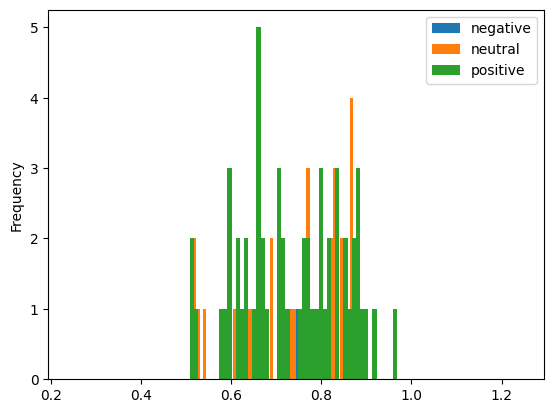

In [41]:
sent_df.groupby("label")["score"].plot(kind="hist", bins=50)
plt.legend()
plt.show()

In [42]:
sent_df.sample(5)

,0,label,score,Unnamed: 0,Datetime,Text,Username
1.622511e+18,"{'label': 'positive', 'score': 0.6110458374023...",positive,0.611046,33,2023-02-06 08:21:03+00:00,$NVDA Top analyst price target for next week:~...,beear2274
1.622536e+18,"{'label': 'positive', 'score': 0.8929926753044...",positive,0.892993,5,2023-02-06 10:00:13+00:00,$NVDA Top analyst price target for next week📈📉...,RonaldBevan2
1.622483e+18,"{'label': 'positive', 'score': 0.880038321018219}",positive,0.880038,70,2023-02-06 06:30:19+00:00,$NVDA Top analyst price target for the week📉🚀 ...,Keith82084334
1.622526e+18,"{'label': 'positive', 'score': 0.5941735506057...",positive,0.594174,16,2023-02-06 09:22:08+00:00,$nvda Top analyst price target for next week ...,Genevie90548954
1.622517e+18,"{'label': 'positive', 'score': 0.620048999786377}",positive,0.620049,29,2023-02-06 08:47:46+00:00,$nvda Top analyst price target for next week ...,Adeline60327104


In [43]:
sent_df["Datetime"] = pd.to_datetime(sent_df["Datetime"])


In [44]:
sent_df["Date"] = sent_df["Datetime"].dt.date


In [45]:
sent_df["Date"]

,Date
1.622537e+18,2023-02-06
1.622537e+18,2023-02-06
1.622537e+18,2023-02-06
1.622537e+18,2023-02-06
1.622536e+18,2023-02-06
...,...
1.622472e+18,2023-02-06
1.622472e+18,2023-02-06
1.622472e+18,2023-02-06
1.622472e+18,2023-02-06


In [57]:
sent_daily = sent_df.groupby("Date")["score"].mean()
sent_daily

,score
Date,
2023-02-06,0.74558


In [48]:
Nvidia_df = hists["NVDA"].copy()
Nvidia_df = Nvidia_df.reset_index()
Nvidia_df["Date"] = Nvidia_df["Date"].dt.date
Nvidia_df = Nvidia_df.set_index("Date")
Nvidia_df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-11,5.168609,5.202445,5.082279,5.179307,243436000,0.0,0.0
2019-11-12,5.217621,5.270863,5.182542,5.214885,283504000,0.0,0.0
2019-11-13,5.183537,5.211153,5.122584,5.189011,300188000,0.0,0.0
2019-11-14,5.197968,5.221603,5.138009,5.219364,518080000,0.0,0.0
2019-11-15,5.217123,5.268872,4.991720,5.080040,1053628000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-04,137.210007,138.960007,135.570007,136.050003,187528200,0.0,0.0
2024-11-05,137.449997,140.369995,137.330002,139.910004,160537400,0.0,0.0
2024-11-06,142.960007,146.490005,141.960007,145.610001,242043900,0.0,0.0


In [55]:
sent_and_stock = sent_daily.to_frame("sentiment").merge(Nvidia_df, left_index=True, right_index=True)
sent_and_stock

,sentiment,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2023-02-06,0.74558,20.79231,21.555807,20.772323,21.075125,452197000,0.0,0.0
